In [4]:
import rclpy
from sensor_msgs.msg import Image, PointCloud2
from matplotlib import pyplot as plt
from threading import Thread
rclpy.init()

In [5]:
node = rclpy.create_node("basic_jupyter_example")
msg = None
depth = None
points = None

def depth_listener_callback(data):
    global depth
    depth = data

def points_listener_callback(data):
    global points
    points = data

def listener_callback(data):
    global msg
    msg = data

subs = [node.create_subscription(
            Image,
            '/realsense/'+n,
            cb,
            10) for (n, cb) in [("image", listener_callback),
                                ("depth_image", depth_listener_callback),
                                ]]

node.create_subscription(
            PointCloud2,
            '/realsense/points',
            points_listener_callback,
            10)

# Spin the node in background thread(s) and wait a bit for initialization
executor = rclpy.executors.MultiThreadedExecutor(4)
executor.add_node(node)
executor_thread = Thread(target=executor.spin, daemon=True, args=())
executor_thread.start() # Using threads, our node will keep spinning while we code 

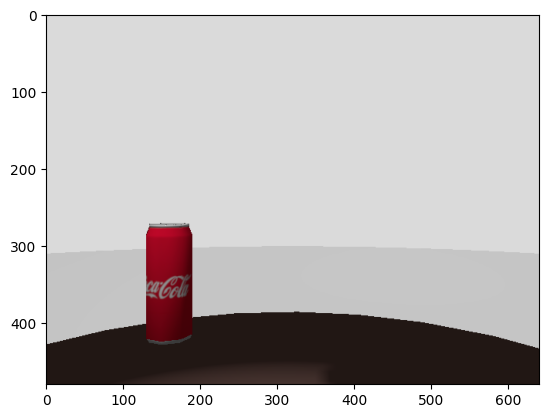

In [8]:
import numpy as np

height = msg.height
width = msg.width
channels = msg.step // width
img = np.frombuffer(msg.data, dtype=np.uint8).reshape(height, width, channels)
plt.imshow(img)
plt.show()

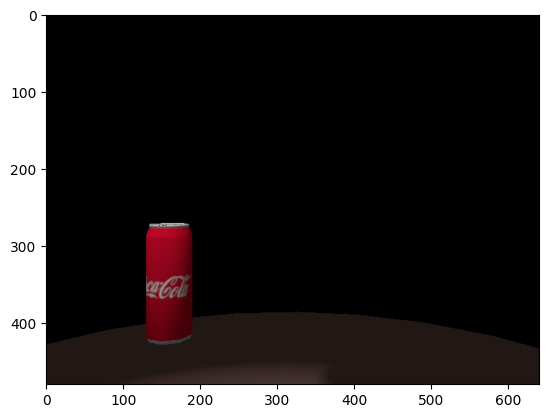

In [9]:
# Create a basic mask for the colour red
mask =img[:,:,0] > 190

new_img = img.copy()
new_img[mask] = 0

plt.imshow(new_img)
plt.show()